<a href="https://colab.research.google.com/github/Prachi9539/ML/blob/main/exp2_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=16)
sns.set_style('darkgrid')

In [ ]:
train = pd.read_csv('../content/sample_data/train.csv')
test = pd.read_csv('../content/sample_data/test.csv')

In [ ]:
train.shape, test.shape
((891, 12), (418, 11))

((891, 12), (418, 11))

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.drop(columns=['Cabin'], inplace=True)
train.dropna(subset=['Embarked'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)
test.dropna(subset=['Embarked','Fare'], inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
def convert_embarked(x):
    if x == "C":
        return "Cherbourg"
    elif x == 'Q':
        return "Queenstown"
    elif x == 'S':
        return "Southampton"
train.Embarked = train.Embarked.map(convert_embarked)
test.Embarked = train.Embarked.map(convert_embarked)

In [ ]:
train['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

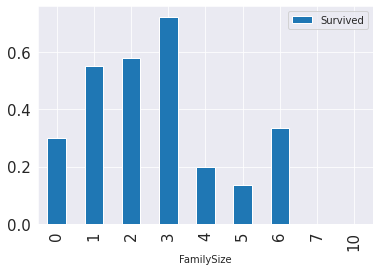

In [ ]:
train.groupby('FamilySize').agg({"Survived" : 'mean'}).plot(kind='bar')

In [ ]:
train.drop(columns=['PassengerId','Ticket'], inplace=True)
test.drop(columns=['PassengerId','Ticket'], inplace=True)

In [ ]:
train['Title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,Southampton,1,Mr
1,1,1,female,38.0,1,0,71.2833,Cherbourg,1,Mrs
2,1,3,female,26.0,0,0,7.9250,Southampton,0,Miss
3,1,1,female,35.0,1,0,53.1000,Southampton,1,Mrs
4,0,3,male,35.0,0,0,8.0500,Southampton,0,Mr


In [ ]:
train['Pclass'] = train['Pclass'].astype(str)
test['Pclass'] = test['Pclass'].astype(str)

In [ ]:
train = pd.get_dummies(train, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)

In [ ]:
train.dtypes

Survived                  int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
FamilySize                int64
Sex_male                  uint8
Embarked_Queenstown       uint8
Embarked_Southampton      uint8
Pclass_2                  uint8
Pclass_3                  uint8
Title_Col                 uint8
Title_Don                 uint8
Title_Dr                  uint8
Title_Jonkheer            uint8
Title_Lady                uint8
Title_Major               uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mlle                uint8
Title_Mme                 uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Ms                  uint8
Title_Rev                 uint8
Title_Sir                 uint8
Title_the Countess        uint8
dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# train
impute_train = train[train.Age.isnull()].drop(['Age'], axis=1)
impute_train.describe()
# test
impute_test = test[test.Age.isnull()].drop(['Age'], axis=1)
impute_test.describe()

,SibSp,Parch,Fare,FamilySize,Sex_male,Pclass_2,Pclass_3,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.0,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.313953,0.372093,15.017055,0.686047,0.709302,0.05814,0.837209,0.0,0.0,0.046512,0.162791,0.662791,0.116279,0.011628,0.0
std,0.973310,1.471666,14.184527,1.953950,0.456748,0.23538,0.371340,0.0,0.0,0.211825,0.371340,0.475530,0.322439,0.107833,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,7.750000,0.000000,0.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,7.972900,0.000000,1.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,15.559400,0.000000,1.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,8.000000,9.000000,69.550000,10.000000,1.000000,1.00000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
# train
knr = KNeighborsRegressor()
titanic_knn_train = train[train.Age.notnull()]
X_train = titanic_knn_train.drop(['Age'], axis = 1)
y_train = titanic_knn_train.Age
knr.fit(X_train, y_train)
imputed_train_ages = knr.predict(impute_train)
imputed_train_ages
# test
knr = KNeighborsRegressor()
titanic_knn_test = test[test.Age.notnull()]
X_test = titanic_knn_test.drop(['Age'], axis = 1)
y_test = titanic_knn_test.Age
X_test.isnull().sum()
knr.fit(X_test, y_test)
imputed_test_ages = knr.predict(impute_test)
imputed_test_ages

array([28.2  , 37.2  , 28.8  , 22.   , 23.   , 37.4  , 39.4  , 23.4  ,
       33.7  , 32.8  , 27.   , 26.4  , 28.2  , 29.4  , 34.1  , 27.4  ,
       25.8  , 26.4  , 23.4  , 23.4  , 22.6  , 25.8  , 23.7  , 23.4  ,
       23.4  , 24.8  , 26.384, 22.6  , 41.4  , 39.4  , 28.2  , 24.4  ,
       23.7  , 43.6  , 26.6  , 22.5  , 23.4  , 38.1  , 40.   , 28.4  ,
       23.7  , 40.   , 23.7  , 23.4  , 26.4  , 18.066, 27.4  , 28.4  ,
       28.4  , 19.6  , 26.8  , 26.6  , 23.4  , 28.2  , 26.4  , 26.6  ,
       23.   , 23.4  , 15.2  , 23.3  , 27.4  , 30.3  , 22.5  , 26.4  ,
       36.4  , 22.5  , 28.8  , 31.4  , 27.4  , 26.6  , 23.3  , 22.5  ,
       34.3  ,  5.116, 28.4  , 23.4  , 34.3  , 34.1  , 23.4  , 33.5  ,
       28.5  , 24.4  , 27.4  , 26.4  , 26.4  , 16.4  ])

In [ ]:
# test
impute_test['Age'] = imputed_test_ages
# train
impute_train['Age'] = imputed_train_ages
impute_train.head(10)


,Survived,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Age
5,0,0,0,8.4583,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,47.800
17,1,0,0,13.0000,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,31.200
19,1,0,0,7.2250,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,18.400
26,0,0,0,7.2250,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,32.500
28,1,0,0,7.8792,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,17.600
29,0,0,0,7.8958,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,28.600
31,1,1,0,146.5208,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,21.584
32,1,0,0,7.7500,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,17.600
36,1,0,0,7.2292,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,24.600
42,0,0,0,7.8958,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,28.700


In [ ]:
# train
titanic_train_imputed = pd.concat([titanic_knn_train, impute_train], sort=False, axis=0)
train = titanic_train_imputed
# test
titanic_test_imputed = pd.concat([titanic_knn_test, impute_test], sort=False, axis=0)
test = titanic_test_imputed

In [ ]:
train.isnull().sum()

Survived                0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
FamilySize              0
Sex_male                0
Embarked_Queenstown     0
Embarked_Southampton    0
Pclass_2                0
Pclass_3                0
Title_Col               0
Title_Don               0
Title_Dr                0
Title_Jonkheer          0
Title_Lady              0
Title_Major             0
Title_Master            0
Title_Miss              0
Title_Mlle              0
Title_Mme               0
Title_Mr                0
Title_Mrs               0
Title_Ms                0
Title_Rev               0
Title_Sir               0
Title_the Countess      0
dtype: int64

In [ ]:
train['Age'].describe()

count    889.000000
mean      29.945226
std       13.728144
min        0.420000
25%       21.000000
50%       28.600000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# train
train['Age'] = np.round(train['Age']).astype(int)
# test
test['Age'] = np.round(test['Age']).astype(int)

In [ ]:
train['Age'].value_counts()

18    43
28    41
29    38
30    37
24    34
      ..
0      1
12     1
53     1
66     1
74     1
Name: Age, Length: 71, dtype: int64

In [ ]:
# train
train.to_csv('./train_processed.csv')
# test
test.to_csv('./test_processed.csv')

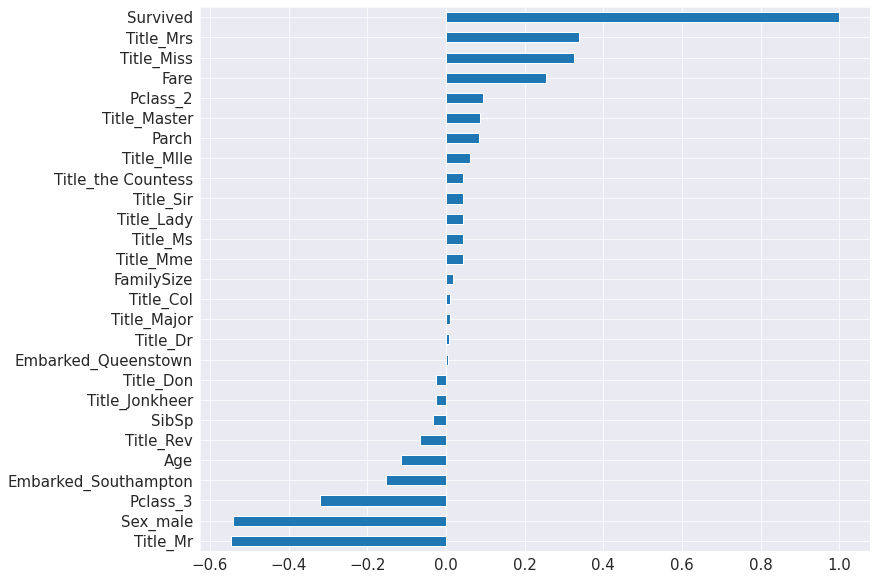

In [ ]:
plt.figure(figsize = (12,10))
train.corr()['Survived'].sort_values(ascending = True).plot(kind = 'barh')

Index(['Survived', 'Title_Mrs', 'Title_Miss', 'Fare', 'Pclass_2',
       'Title_Master', 'Parch'],
      dtype='object')


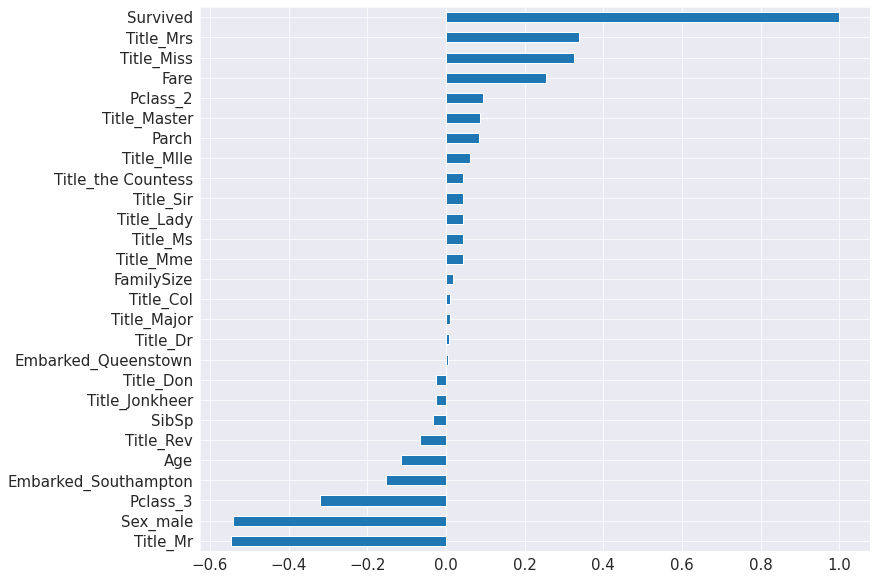

In [ ]:
plt.figure(figsize = (12,10))
train.corr()['Survived'].sort_values(ascending = True).plot(kind = 'barh')
top_6 = train.corr()['Survived'].sort_values(ascending = False).keys()[0:7]
print (top_6)



,Survived,Title_Mrs,Title_Miss,Fare,Pclass_2,Title_Master,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.139483,0.203600,32.096681,0.206974,0.044994,0.382452
std,0.486260,0.346644,0.402901,49.697504,0.405365,0.207408,0.806761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,512.329200,1.000000,1.000000,6.000000


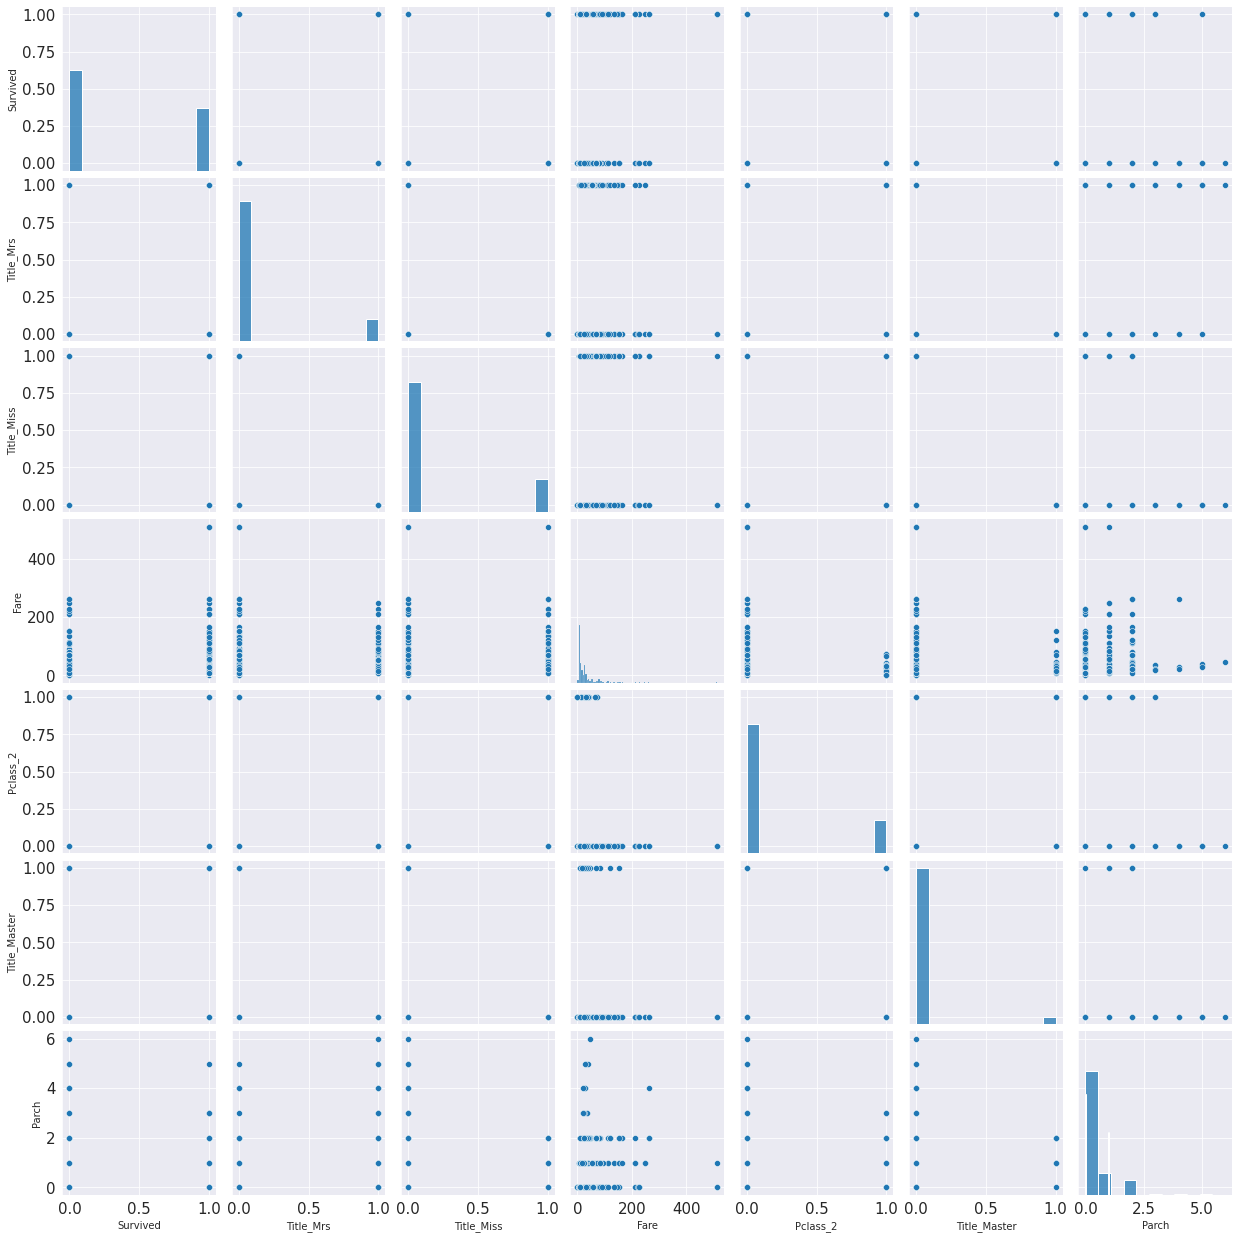

In [ ]:
top_6_train = train.loc[:,top_6].copy()
top_6_train.head()
sns.pairplot(top_6_train)
top_6_train['Survived'].hist(bins=40)
top_6_train.describe()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [ ]:
y = train['Survived']
X = train.loc[:, ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X.shape, y.shape
((889, 28), (889,))

((889, 28), (889,))

In [ ]:
X_train.shape, y_train.shape
((622, 28), (622,))

((622, 28), (622,))

In [ ]:
X_test.shape, y_test.shape
((267, 26), (267,))

((267, 26), (267,))

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])
X_train


,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,-0.877760,-0.467125,-0.463389,-0.418093,-0.558271,0.721653,-0.295656,0.613275,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
1,1.260770,-0.467125,-0.463389,-0.497440,-0.558271,0.721653,3.382307,-1.630590,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
2,0.262789,0.473172,-0.463389,-0.111289,0.081222,0.721653,-0.295656,0.613275,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
3,1.189486,-0.467125,-0.463389,-0.011930,-0.558271,0.721653,-0.295656,-1.630590,-0.506523,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
4,-0.877760,-0.467125,0.768354,-0.463585,0.081222,-1.385708,-0.295656,0.613275,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,-1.195695,2.530763,0.0,-0.056796,-0.040129,-0.040129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.120221,-0.467125,-0.463389,-0.508548,-0.558271,0.721653,-0.295656,-1.630590,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
618,2.044898,-0.467125,-0.463389,-0.111289,-0.558271,0.721653,-0.295656,0.613275,-0.506523,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
619,2.044898,-0.467125,-0.463389,-0.508019,-0.558271,0.721653,-0.295656,0.613275,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
620,0.405358,-0.467125,-0.463389,-0.389000,-0.558271,0.721653,-0.295656,-1.630590,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(max_iter=500)

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)
(0.8263665594855305, 0.8389513108614233)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(0.8263665594855305, 0.8389513108614233)

In [ ]:
y_hat = lr.predict(X_test)
X_test_display = X_test.copy()
X_test_display['Predicted_Survived'] = y_hat
X_test_display['Survived_True'] = y_test.to_numpy()
X_test_display.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Predicted_Survived,Survived_True
0,0.453090,0.346856,-0.500613,1.020640,0.008699,-1.302678,-0.335410,0.625,-0.520988,-1.140931,...,-0.061314,0.0,-1.140931,2.382226,-0.061314,-0.123325,0.0,0.0,1,1
1,0.066341,-0.495059,-0.500613,-0.395766,-0.571945,-1.302678,2.981424,-1.600,1.919430,-1.140931,...,-0.061314,0.0,-1.140931,-0.419775,-0.061314,-0.123325,0.0,0.0,1,1
2,-0.861856,-0.495059,-0.500613,-0.479675,-0.571945,-1.302678,2.981424,-1.600,-0.520988,0.876477,...,-0.061314,0.0,-1.140931,-0.419775,-0.061314,-0.123325,0.0,0.0,1,1
3,0.453090,-0.495059,-0.500613,8.724308,-0.571945,-1.302678,-0.335410,-1.600,-0.520988,-1.140931,...,-0.061314,0.0,-1.140931,-0.419775,-0.061314,-0.123325,0.0,0.0,1,1
4,1.226587,0.346856,0.760365,2.386277,0.589342,-1.302678,-0.335410,0.625,-0.520988,-1.140931,...,-0.061314,0.0,-1.140931,2.382226,-0.061314,-0.123325,0.0,0.0,1,1


In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       171
           1       0.76      0.80      0.78        96

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


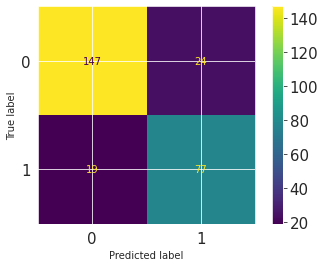

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [ ]:
train['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=3)

In [ ]:
dtc.score(X_train, y_train), dtc.score(X_test, y_test)
(0.8344051446945338, 0.8239700374531835)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(0.8344051446945338, 0.8239700374531835)

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       171
           1       0.76      0.80      0.78        96

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


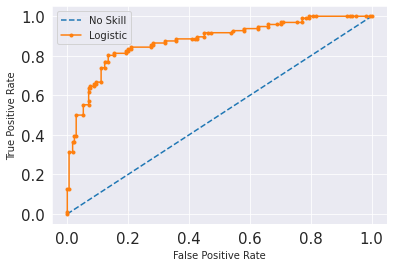

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarise scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()